# Análisis exploratorio de datos

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
dftrain = pd.read_csv("train.csv")
dftest = pd.read_csv("test.csv")
dfgendersubmission = pd.read_csv("gender_submission.csv")

In [3]:
dftrain.shape #Dimensión de la base de datos

(891, 12)

In [4]:
dftrain.info() #Información sobre las variables del dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
dftrain.head() #Encabezado del dataframe

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#pd.set_option('display.max_rows', dftrain.shape[0]+1) #Base de datos entera
#dftrain

In [6]:
dftrain.isnull().sum() #Variables con datos nulos

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

En la base de datos analizamos los diferentes tipos de variables, algunas serán descartadas ya que se considera que no son relevantes dentro del modelo

Las variables que serán descartadas son:

Name
Ticket
Fare
Embarked
Las otras variables se consideran relevantes para el modelo,

Survived: Es la variable dependiente del modelo

Pclass: Esta variable nos muestra en la clase que viajaban los pasajeros en el barco, puede ser explicativa ya que se supone que le dan prioridad a las primeras clases

Sex: Esta variable nos muestra el sexo de los pasajeros, puede ser explicartiva ya que se supone que le dan prioridad a las mujeres

Age: Es la variable con la edad de los pasajeros, puede ser explicativa ya que se supone que le dan prioridad a las personas más jovenes

SibSp: Es la variable que nos muestra el número de herman@s que tiene el pasajero, puede ser explicativa ya que se supone que le dan prioridad a aquel que viaje con sus herman@s

Parch: Es la variable que nos muestra el número de hijos que tiene el pasajero, puede ser explicativa ya que se supone que le dan prioridad a personas que tengan hijos para que estos no queden huérfanos

cabin: Es la variable que nos muestra en que cabina estaba ubicado el pasajero, puede ser explicativa ya que se supone que es mas probable que las personas que estuvieran más cerca de la borda del barco les tocara puesto en los botes salvavidas, y así tener mas tiempo para salvarse.

In [7]:
dftrain = dftrain.drop(["Name","Ticket","Fare","Embarked"],axis=1) # Descartamos las variables que no son de interés
dftrain

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin
0,1,0,3,male,22.0,1,0,NaN
1,2,1,1,female,38.0,1,0,C85
2,3,1,3,female,26.0,0,0,NaN
3,4,1,1,female,35.0,1,0,C123
4,5,0,3,male,35.0,0,0,NaN
...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,NaN
887,888,1,1,female,19.0,0,0,B42
888,889,0,3,female,NaN,1,2,NaN
889,890,1,1,male,26.0,0,0,C148


In [8]:
dftrain = dftrain.fillna(0) #Reemplazamos los datos nulos por 0s
dftrain

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin
0,1,0,3,male,22.0,1,0,0
1,2,1,1,female,38.0,1,0,C85
2,3,1,3,female,26.0,0,0,0
3,4,1,1,female,35.0,1,0,C123
4,5,0,3,male,35.0,0,0,0
...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,0
887,888,1,1,female,19.0,0,0,B42
888,889,0,3,female,0.0,1,2,0
889,890,1,1,male,26.0,0,0,C148


In [9]:
dftrain.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Cabin          0
dtype: int64

In [10]:
dftrain = dftrain.set_index("PassengerId") #Cambiamos el indice por passanger Id
dftrain

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin
PassengerId,,,,,,,
1,0,3,male,22.0,1,0,0
2,1,1,female,38.0,1,0,C85
3,1,3,female,26.0,0,0,0
4,1,1,female,35.0,1,0,C123
5,0,3,male,35.0,0,0,0
...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,0
888,1,1,female,19.0,0,0,B42
889,0,3,female,0.0,1,2,0


In [11]:
matriz= dftrain['Cabin'].unique() #Valores unicos de la variable Cabin
len(matriz) #Cantidad de valores únicos de la variable Cabin

148

In [12]:
print(matriz)

[0 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']


In [13]:
matriz2= dftrain['Sex'].unique()
len(matriz2) #Cantidad de valores únicos de la variable Cabin

2

Se comprueba que en las variables está el total de los individuos

In [14]:
dftrain['Sex'].value_counts() #Cantidad de hombres/mujeres que habían en el titanic

male      577
female    314
Name: Sex, dtype: int64

In [15]:
dftrain['Pclass'].value_counts() #Cantidad de personas que habían por clase en el titanic

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [16]:
dftrain.describe()

,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,23.799293,0.523008,0.381594
std,0.486592,0.836071,17.596074,1.102743,0.806057
min,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,6.000000,0.000000,0.000000
50%,0.000000,3.000000,24.000000,0.000000,0.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000


In [17]:
dftrain['Sex'].replace(['female','male'],[0,1],inplace=True) #Nos cambia la variable female por 0 y male por 1
dftrain

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin
PassengerId,,,,,,,
1,0,3,1,22.0,1,0,0
2,1,1,0,38.0,1,0,C85
3,1,3,0,26.0,0,0,0
4,1,1,0,35.0,1,0,C123
5,0,3,1,35.0,0,0,0
...,...,...,...,...,...,...,...
887,0,2,1,27.0,0,0,0
888,1,1,0,19.0,0,0,B42
889,0,3,0,0.0,1,2,0


Cantidad de mujeres y hombres en el train 

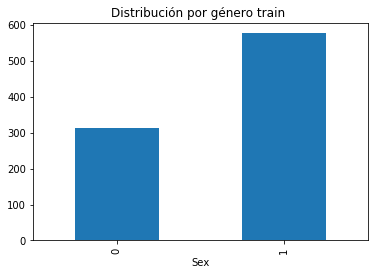

In [19]:
# Grafico del género de los donantes
dftrain.groupby('Sex').size().plot(kind='bar')
plt.title('Distribución por género train ')
plt.show()


In [20]:
porcent_sobrevivientes = (dftrain[dftrain.Survived
                             > 0]['Survived'].count() * 1.0
       / dftrain['Survived'].count()) * 100.0
print("El porcentaje de sobrevivientes de la base de datos es {0:.2f}%"
      .format(porcent_sobrevivientes))

El procentaje de sobrevivientes de la base de datos es 38.38%


In [21]:
# Creando subset con solo con los sobrevivientes
dftrain_sobrevivientes = dftrain[dftrain.Survived > 0]

In [23]:
dftrain_sobrevivientes

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin
PassengerId,,,,,,,
2,1,1,0,38.0,1,0,C85
3,1,3,0,26.0,0,0,0
4,1,1,0,35.0,1,0,C123
9,1,3,0,27.0,0,2,0
10,1,2,0,14.0,1,0,0
...,...,...,...,...,...,...,...
876,1,3,0,15.0,0,0,0
880,1,1,0,56.0,0,1,C50
881,1,2,0,25.0,0,1,0


In [22]:
len(dftrain_sobrevivientes)

342

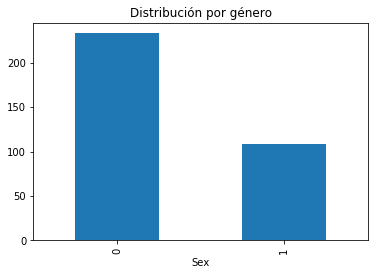

In [24]:
dftrain_sobrevivientes.groupby('Sex').size().plot(kind='bar')
plt.title('Distribución por género')
plt.show()  #Male=1 Female=0

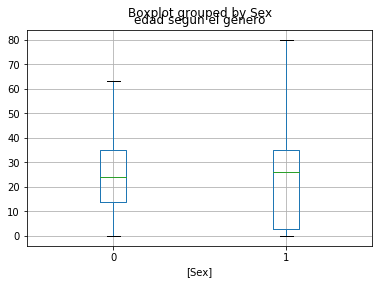

In [27]:
# edad segun el género
dftrain_sobrevivientes[(dftrain_sobrevivientes.Age <= 100)
             & (dftrain_sobrevivientes.Sex.isin(['0', '1'])
               )][['Age', 'Sex']].boxplot(by='Sex')
plt.title('edad segun el género')
plt.show()

In [28]:
# Media de edad por mujeres 
dftrain_sobrevivientes[dftrain_sobrevivientes.Sex == 0][['Age']].mean()

Age    24.390558
dtype: float64

In [29]:
# Media de clase de sobrevivientes 
dftrain_sobrevivientes[['Pclass']].mean()

Pclass    1.950292
dtype: float64

In [30]:
# Media de edad por hombres
dftrain_sobrevivientes[dftrain_sobrevivientes.Sex == 1][['Age']].mean()

Age    23.272202
dtype: float64

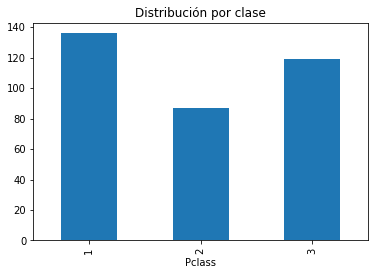

In [31]:
dftrain_sobrevivientes.groupby('Pclass').size().plot(kind='bar')
plt.title('Distribución por clase')
plt.show() 

In [32]:
pclass_gender_survival_count_df= dftrain.groupby(['Pclass','Sex'])['Survived'].sum()
dftrain.groupby(['Pclass','Sex']).count()
dftrain['count'] = 1 # agregar columna
dftrain.groupby(['Pclass','Sex','count']).count()
dftrain.groupby(['Pclass']).sum()

,Survived,Sex,Age,SibSp,Parch,count
Pclass,,,,,,
1,136,122,7111.42,90,77,216
2,87,108,5168.83,74,70,184
3,119,347,8924.92,302,193,491


In [33]:
pclass_gender_survival_count_df

Pclass  Sex
1       0      91
        1      45
2       0      70
        1      17
3       0      72
        1      47
Name: Survived, dtype: int64

In [34]:
# Agrupando la edad por rango de a 10
Age = pd.cut(dftrain['Age'], range(0, 100, 10))
dftrain['Age'] = Age


In [35]:
dftrain_sobrevivientes

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin
PassengerId,,,,,,,
2,1,1,0,38.0,1,0,C85
3,1,3,0,26.0,0,0,0
4,1,1,0,35.0,1,0,C123
9,1,3,0,27.0,0,2,0
10,1,2,0,14.0,1,0,0
...,...,...,...,...,...,...,...
876,1,3,0,15.0,0,0,0
880,1,1,0,56.0,0,1,C50
881,1,2,0,25.0,0,1,0


In [36]:
pclass_gender_survival_count_df= dftrain.groupby(['Pclass','Age'])['Survived'].sum()
pclass_gender_survival_count_df

Pclass  Age     
1       (0, 10]      2.0
        (10, 20]    15.0
        (20, 30]    29.0
        (30, 40]    37.0
        (40, 50]    21.0
        (50, 60]    15.0
        (60, 70]     2.0
        (70, 80]     1.0
        (80, 90]     NaN
2       (0, 10]     17.0
        (10, 20]     9.0
        (20, 30]    25.0
        (30, 40]    19.0
        (40, 50]    10.0
        (50, 60]     2.0
        (60, 70]     1.0
        (70, 80]     NaN
        (80, 90]     NaN
3       (0, 10]     19.0
        (10, 20]    20.0
        (20, 30]    30.0
        (30, 40]    13.0
        (40, 50]     2.0
        (50, 60]     0.0
        (60, 70]     1.0
        (70, 80]     0.0
        (80, 90]     NaN
Name: Survived, dtype: float64